#**Installing yfinance library for collecting data**

In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=aa6db40db654f7ac0834db757d999fb1b7a1e318316a36863f9bd00a3e4f4dda
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


#**Importing library**

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression

# yahoo finance is used to fetch data


import yfinance as yf

# **Collection Of Data using Yahoo Finance Data Set**

In [3]:
DF = yf.download('GC=F','2015-08-09', '2020-08-09', auto_adjust=True)
#DF.info()
#DF.shape
#DF.describe
DF.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2015-08-10,1093.199951,1107.599976,1089.5,1104.199951,900
2015-08-11,1103.800049,1116.699951,1094.0,1107.599976,997
2015-08-12,1106.000000,1124.500000,1101.5,1123.199951,797
2015-08-13,1124.300049,1124.300049,1113.0,1115.699951,441
2015-08-14,1113.900024,1118.800049,1112.5,1112.900024,908


# **Preprocessing Of Data**

In [4]:
DF.index=pd.to_datetime(DF.index)
print(DF.index)
DF.sort_index

DatetimeIndex(['2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13',
               '2015-08-14', '2015-08-17', '2015-08-18', '2015-08-19',
               '2015-08-20', '2015-08-21',
               ...
               '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1275, freq=None)


<bound method DataFrame.sort_index of                    Open         High          Low        Close  Volume
Date                                                                  
2015-08-10  1093.199951  1107.599976  1089.500000  1104.199951     900
2015-08-11  1103.800049  1116.699951  1094.000000  1107.599976     997
2015-08-12  1106.000000  1124.500000  1101.500000  1123.199951     797
2015-08-13  1124.300049  1124.300049  1113.000000  1115.699951     441
2015-08-14  1113.900024  1118.800049  1112.500000  1112.900024     908
...                 ...          ...          ...          ...     ...
2020-08-03  1984.300049  1984.300049  1955.500000  1966.000000     683
2020-08-04  1971.000000  2016.199951  1968.800049  2001.199951    2010
2020-08-05  2024.000000  2050.199951  2011.000000  2031.099976    1422
2020-08-06  2045.500000  2063.000000  2040.000000  2051.500000     294
2020-08-07  2040.099976  2055.000000  2009.599976  2010.099976     808

[1275 rows x 5 columns]>

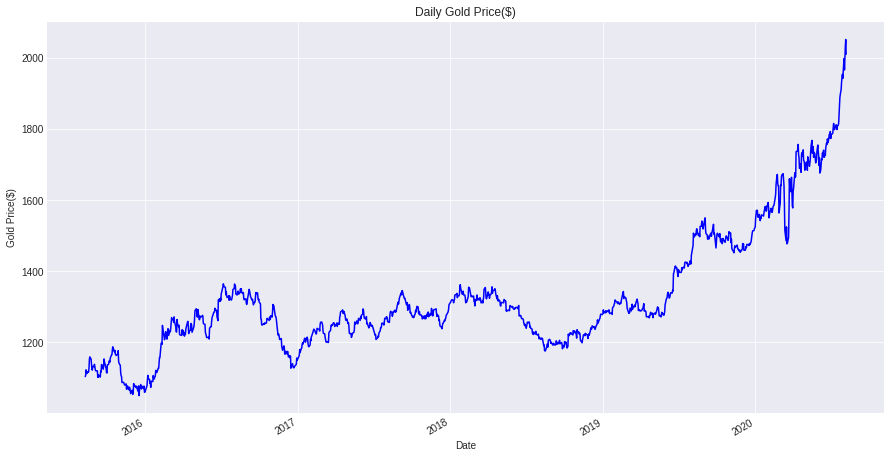

In [5]:
df = DF[['Close']]

# Droping rows which have missing values
df = df.dropna()
# Ploting the closing  prices of GOLD
df['Close'].plot(figsize=(15, 8),color='b')
plt.ylabel("Gold Price($)")
plt.title("Daily Gold Price($)")
plt.show()

In [6]:
import plotly.offline as py
import plotly.graph_objects as go
time_chart=go.Scatter(x=df.index.date,y=df['Close'],name='Date wise chart')
py.iplot([time_chart])

#**Gold Price Year Wise**

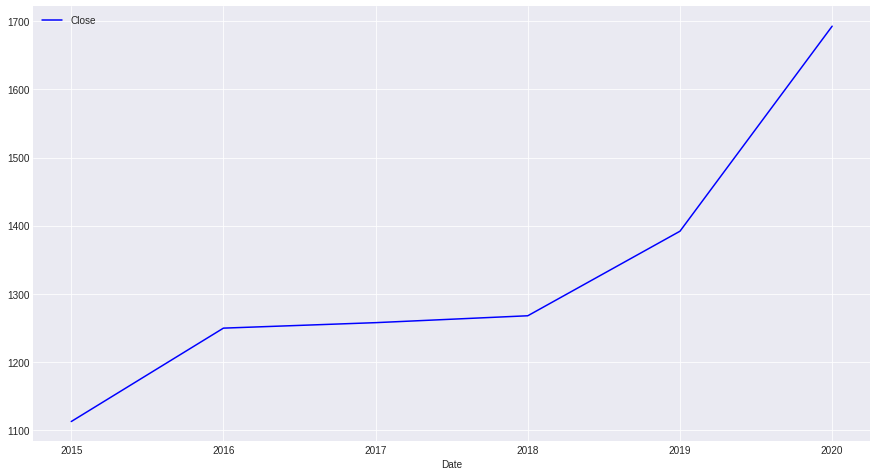

In [7]:
df2=DF[['Close']]
by_year=df2.groupby(df2.index.year).mean()
by_year.plot(figsize=(15, 8),color='b')

#**Day of Year gold price**

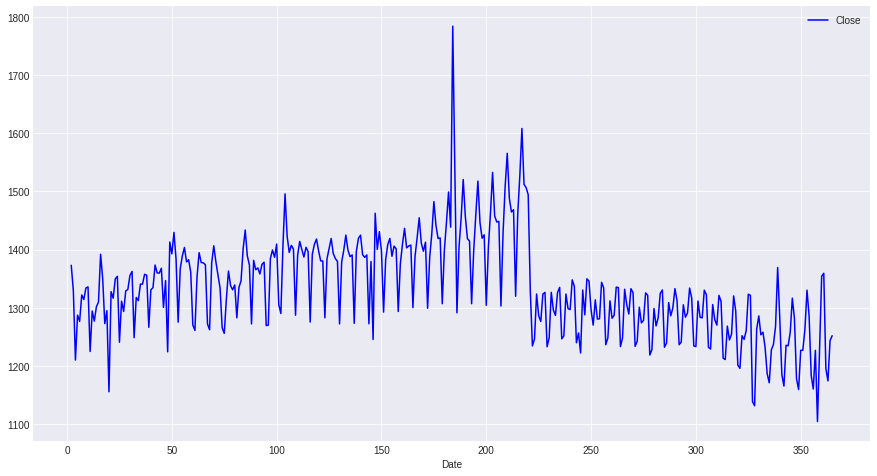

In [8]:
by_day=df2.groupby(df2.index.dayofyear).mean()
by_day.plot(figsize=(15, 8),color='b')

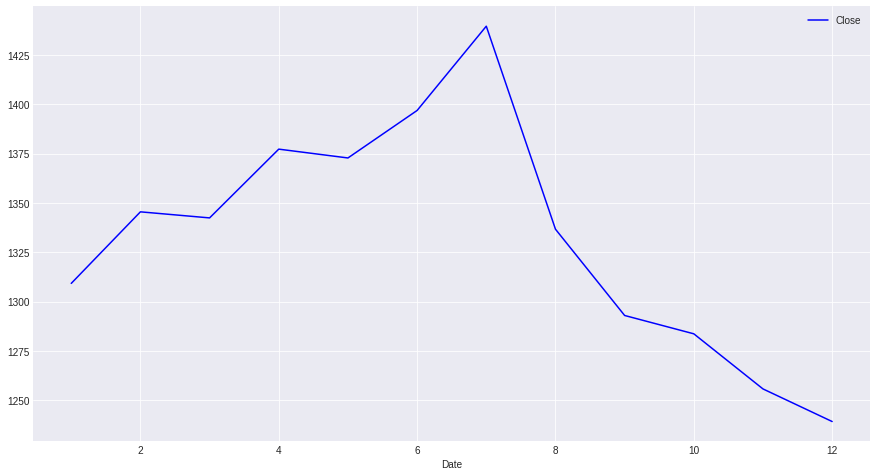

In [9]:
by_month=df2.groupby(df2.index.month).mean()


by_month.plot(figsize=(15, 8),color='b')

#**Prediction of gold price Using MLR(Multiple Linear Regression )**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

DF['S_2'] = DF['Close'].rolling(window=2).mean()
DF['S_5'] = DF['Close'].rolling(window=5).mean()
DF['S_7']=DF['Close'].rolling(window=7).mean()
DF['next_day_gold_price'] = DF['Close'].shift(-1)

Df = DF.dropna()
X = Df[['S_2','S_5','S_7']]

# Define dependent variable
y = Df['next_day_gold_price']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#print(regressor.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

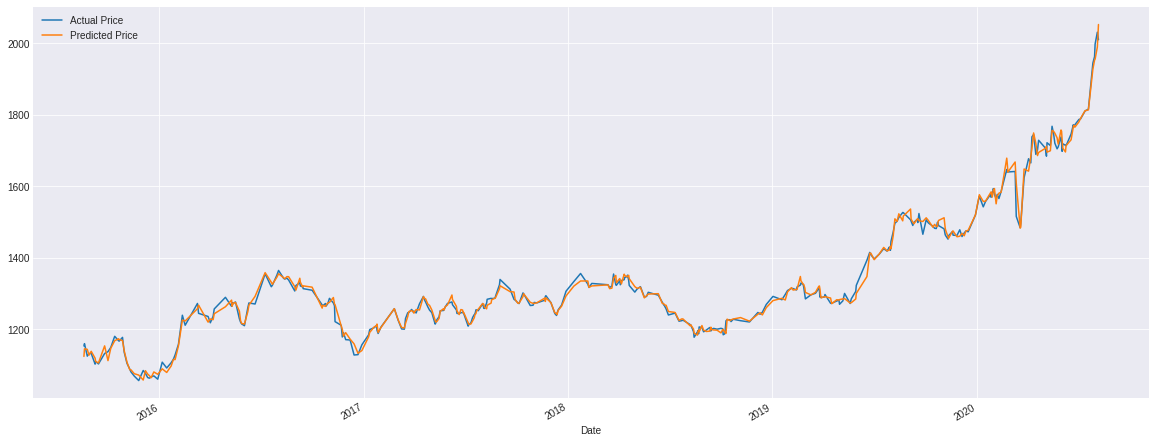

In [11]:
y_pred = regressor.predict(X_test)
df3 = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
df3.plot(figsize=(20, 8))


In [12]:
data=DF
data = data.dropna()
data['signal'] = np.where(data.next_day_gold_price.shift(1) < data.next_day_gold_price,"Buy","No Buy")
data.tail(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,S_2,S_5,S_7,next_day_gold_price,signal
Date,,,,,,,,,,
2020-08-02,1997.400024,2009.500000,1974.199951,1998.000000,1033923,1980.400024,1960.260010,1949.071429,1966.000000,No Buy
2020-08-03,1984.300049,1984.300049,1955.500000,1966.000000,683,1982.000000,1964.520020,1956.900007,2001.199951,Buy
2020-08-04,1971.000000,2016.199951,1968.800049,2001.199951,2010,1983.599976,1974.060010,1966.928571,2031.099976,Buy
2020-08-05,2024.000000,2050.199951,2011.000000,2031.099976,1422,2016.149963,1991.819995,1979.271432,2051.500000,Buy
2020-08-06,2045.500000,2063.000000,2040.000000,2051.500000,294,2041.299988,2009.559985,1993.271432,2010.099976,No Buy


#**Model Evaluation**

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.608850298925518
Mean Squared Error: 187.8251828276358
Root Mean Squared Error: 13.704932791795654


In [14]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN'])

#**Prediction of gold prices Using KNN Regressor**

In [15]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_mse','KNN'] = metrics.mean_squared_error(y_pred=knn.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','KNN'] = metrics.mean_squared_error(y_pred=knn.predict(X_test), 
                                                   y_true=y_test)

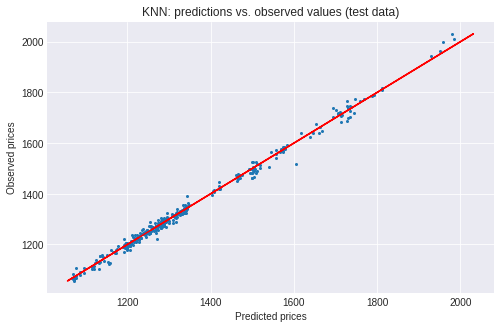

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices');